Importacion de datos y medidas de las variables de los datos

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.describe(include='all')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.corr(numeric_only=True)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


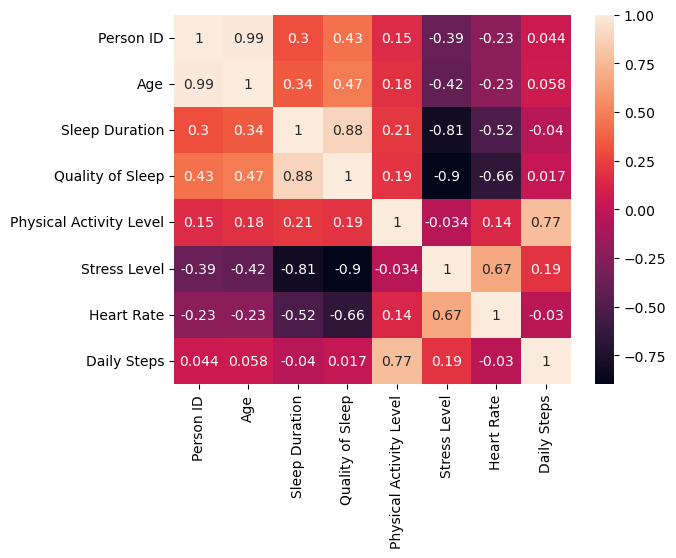

In [4]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot = True)
r = 1.1
plt.rcParams['figure.figsize'] = (r*16,r*9)  # Ajuste de imagen, modifique respecto a su resolución.

plt.show()

In [32]:
columnas_buscadas = ['Age','Quality of Sleep','Physical Activity Level','Heart Rate']
dataExaminada=data[columnas_buscadas]
dataExaminada.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      374 non-null    int64
 1   Quality of Sleep         374 non-null    int64
 2   Physical Activity Level  374 non-null    int64
 3   Heart Rate               374 non-null    int64
dtypes: int64(4)
memory usage: 11.8 KB


<Axes: >

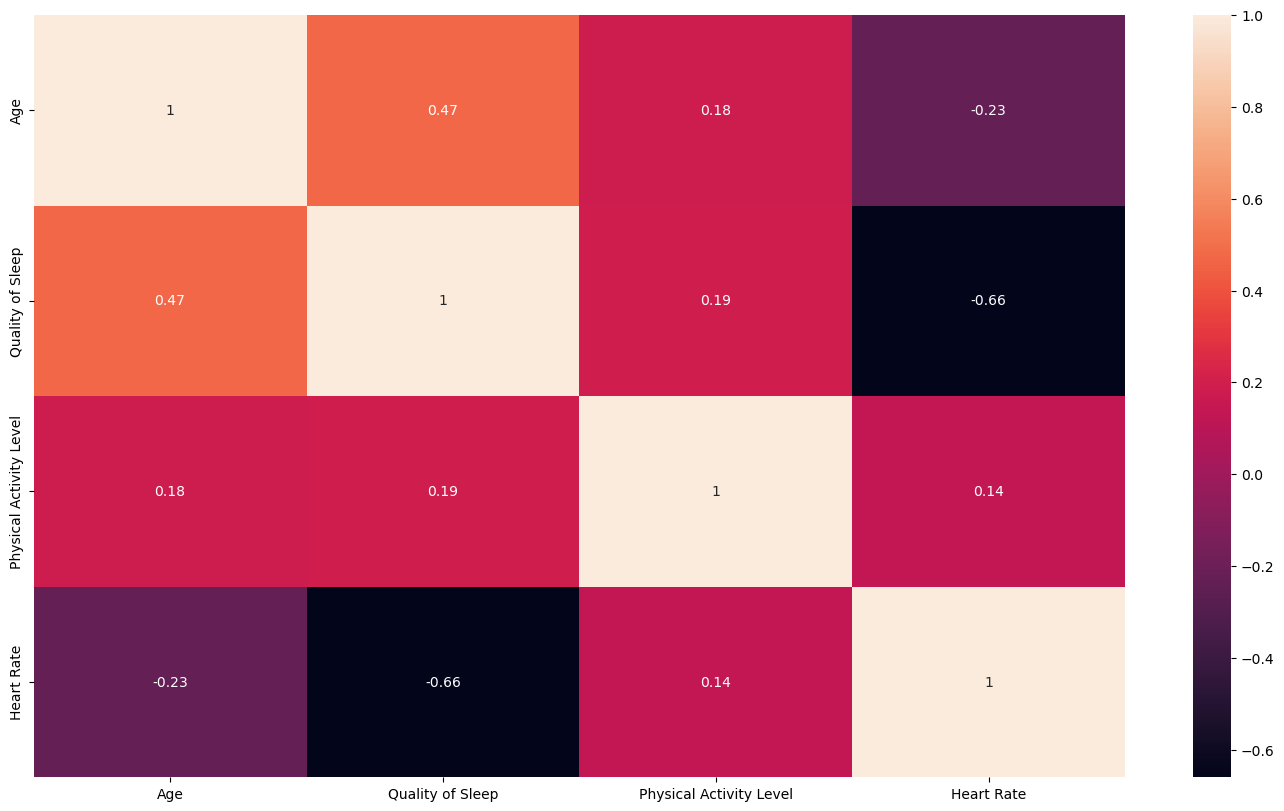

In [8]:
sns.heatmap(dataExaminada.corr(numeric_only=True), annot = True)


Revisar Correlación entre la variables niveles de estrés y tiempo durmiendo



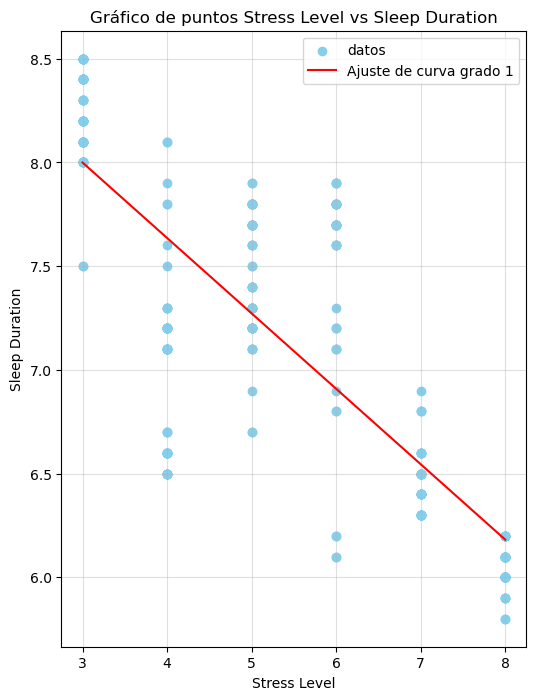

In [4]:
def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes
X=data['Stress Level'].to_numpy()
Y=data['Sleep Duration'].to_numpy()
Coef_P1_P3 = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_P1_P3[0] + Coef_P1_P3[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Gráfico de puntos Stress Level vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

Filtro de edades

<Axes: >

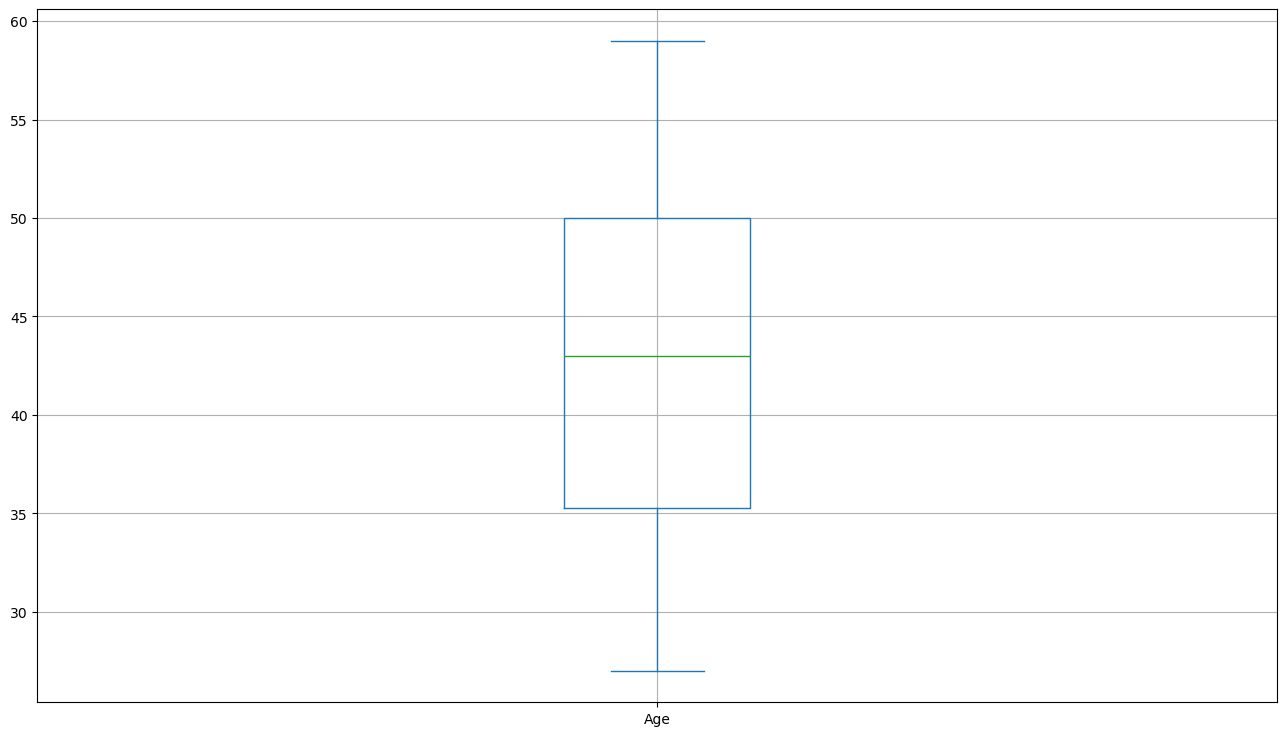

In [60]:
edades=data['Age']
edades.plot(kind='box',figsize=(16,9),grid=True)




Tiempo de dormir grafico

<Axes: >

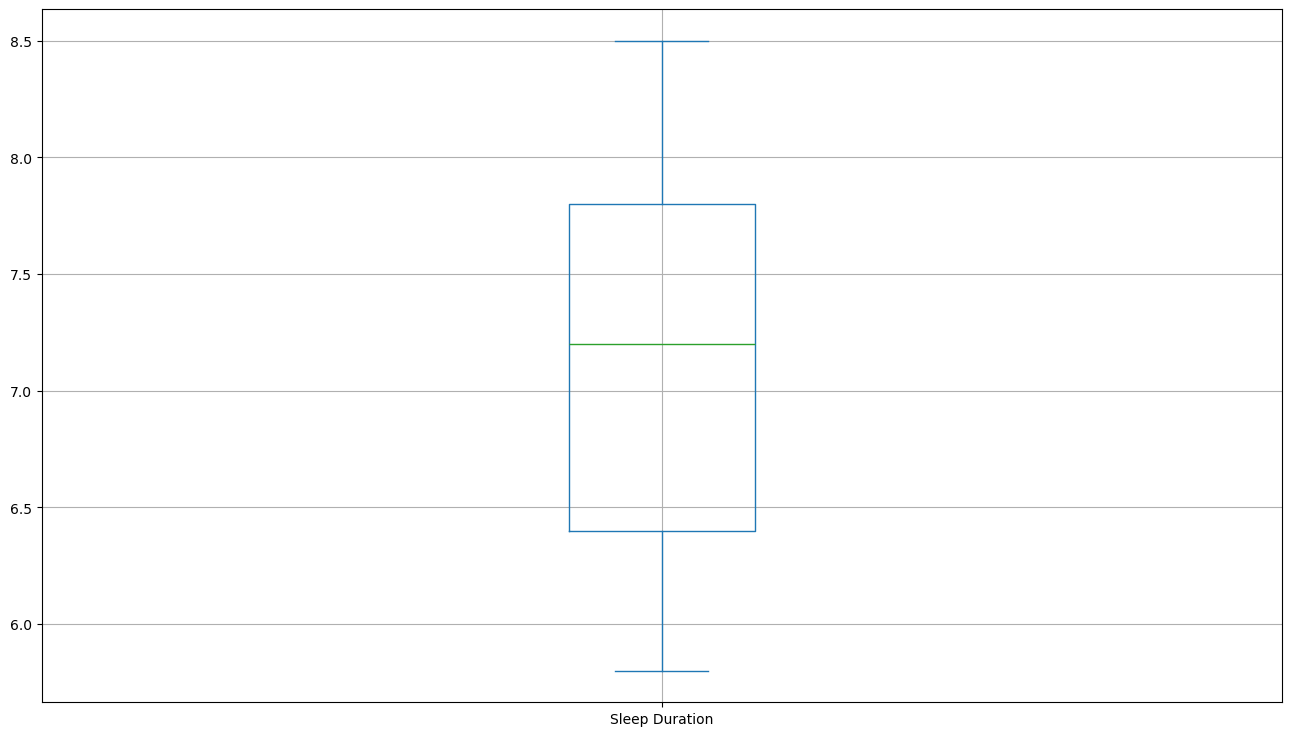

In [61]:
tiempo_de_dormir=data['Sleep Duration']
tiempo_de_dormir.plot(kind='box',figsize=(16,9),grid=True)

Grafico de correlacion Niveles de Estres Vs Edad

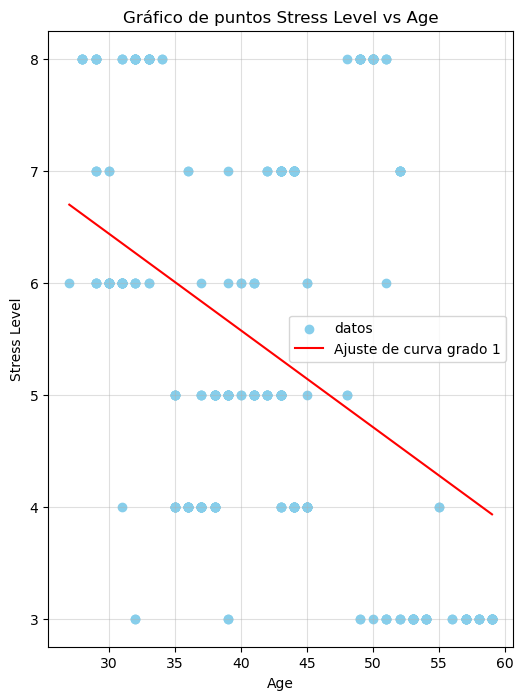

In [5]:
X=data['Age'].to_numpy()
Y=data['Stress Level'].to_numpy()
Coef_Ed_Estr = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
X = data['Age'].to_numpy().reshape(-1, 1)
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Ed_Estr[0] + Coef_Ed_Estr[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Age')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()


<Axes: xlabel='Occupation'>

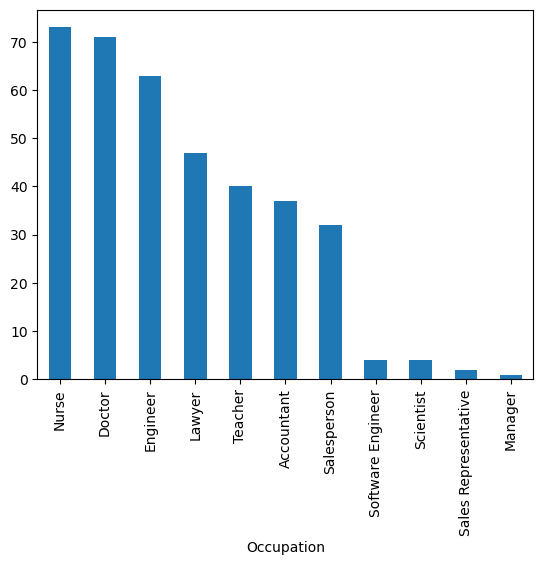

In [7]:
profesiones_count=data["Occupation"].value_counts()
profesiones_count.plot(kind="bar")

<Axes: xlabel='BMI Category'>

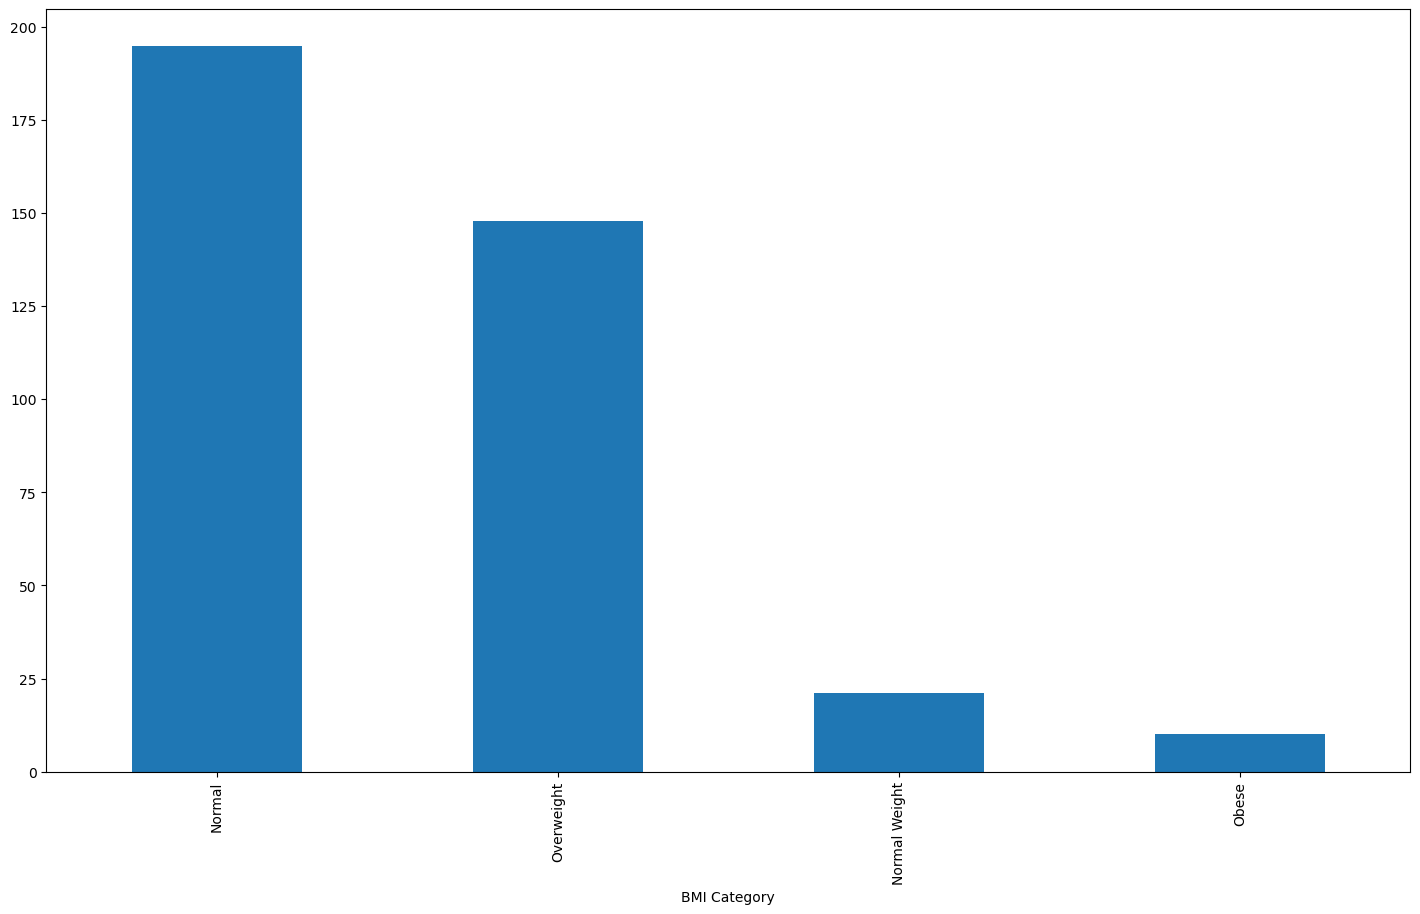

In [20]:
age_count=data["BMI Category"].value_counts()
age_count.plot(kind="bar")


<Axes: xlabel='Gender'>

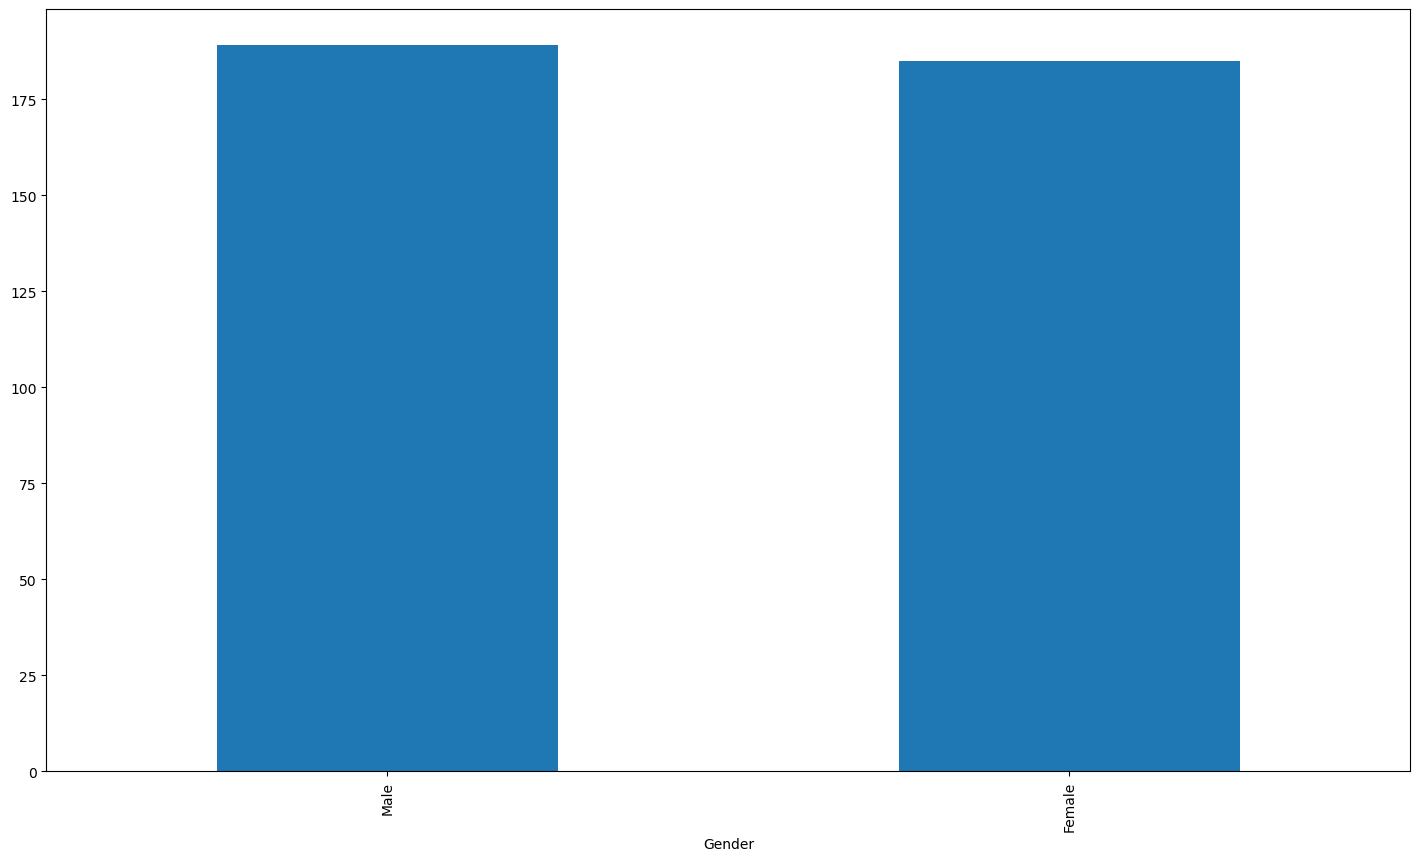

In [31]:
data_gender=data['Gender'].value_counts()
data_gender.plot(kind='bar')

<Axes: xlabel='Hours', ylabel='Frequency'>

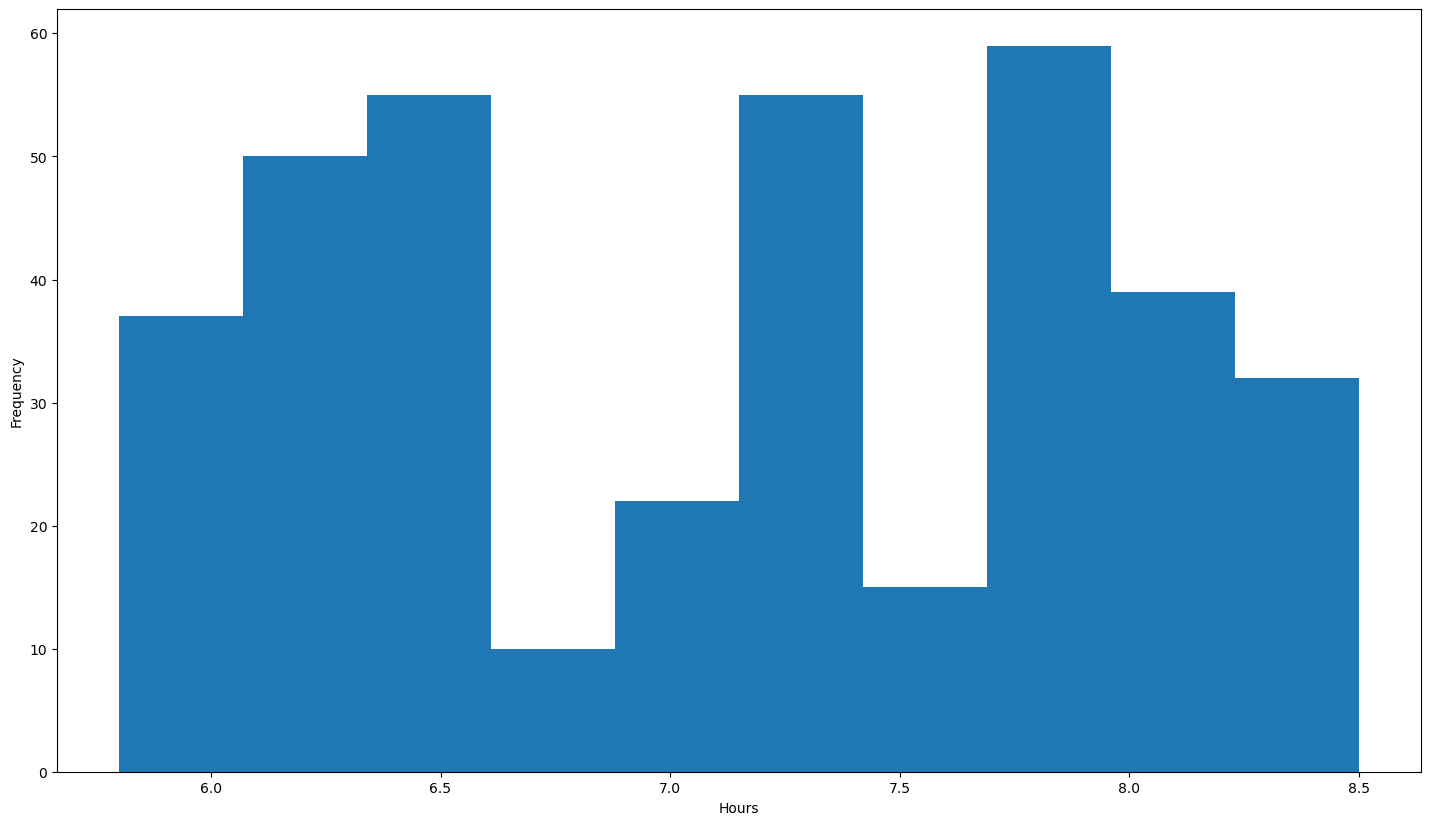

In [63]:
data["Sleep Duration"].plot(kind="hist",xlabel="Hours")

<Axes: xlabel='Sleep Disorder'>

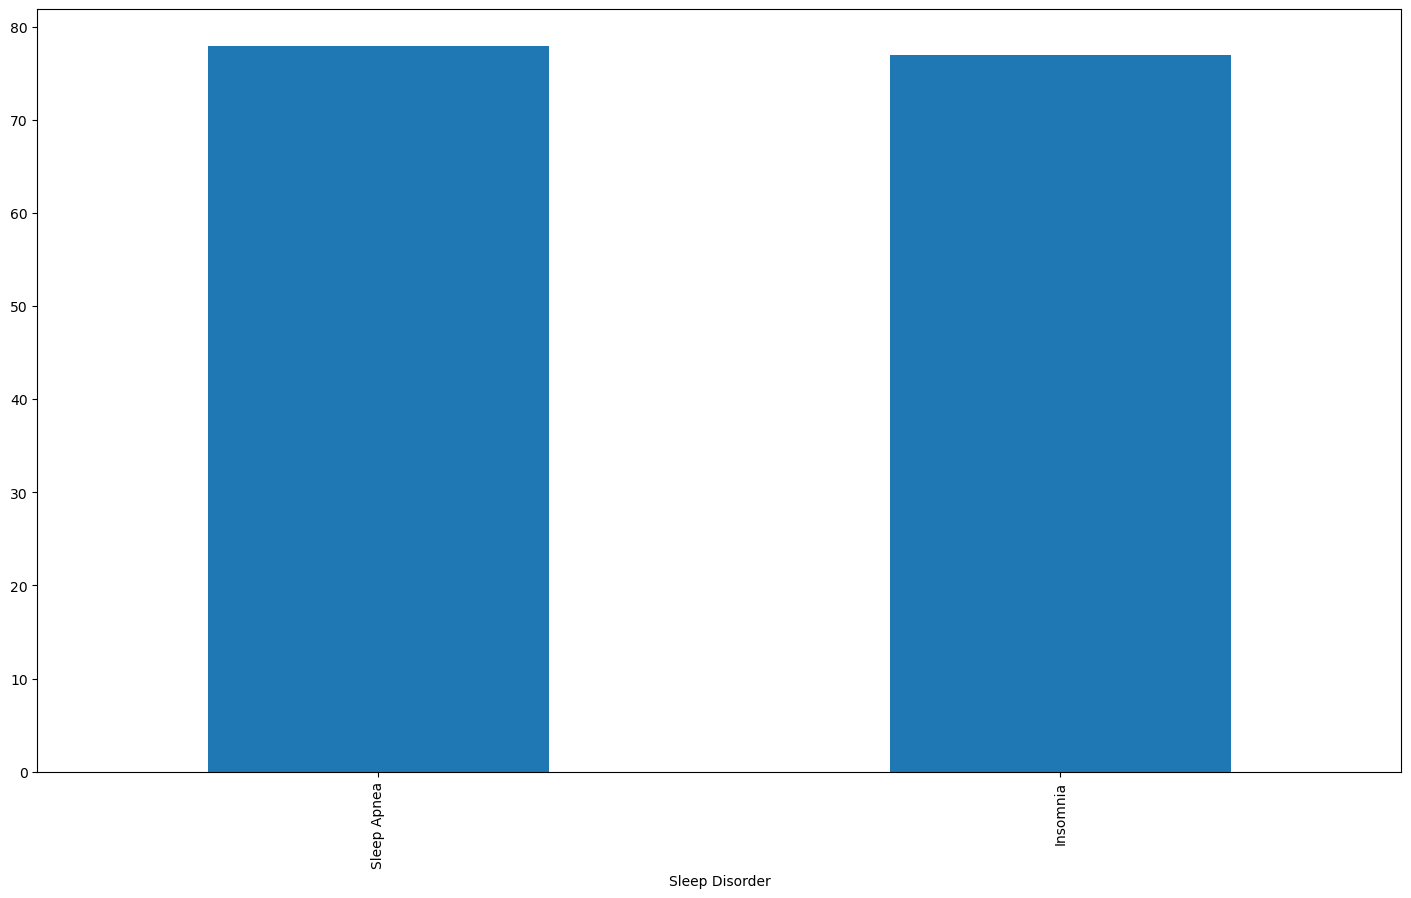

In [68]:
data['Sleep Disorder'].value_counts().plot(kind='bar')

<Axes: xlabel='Quality of Sleep'>

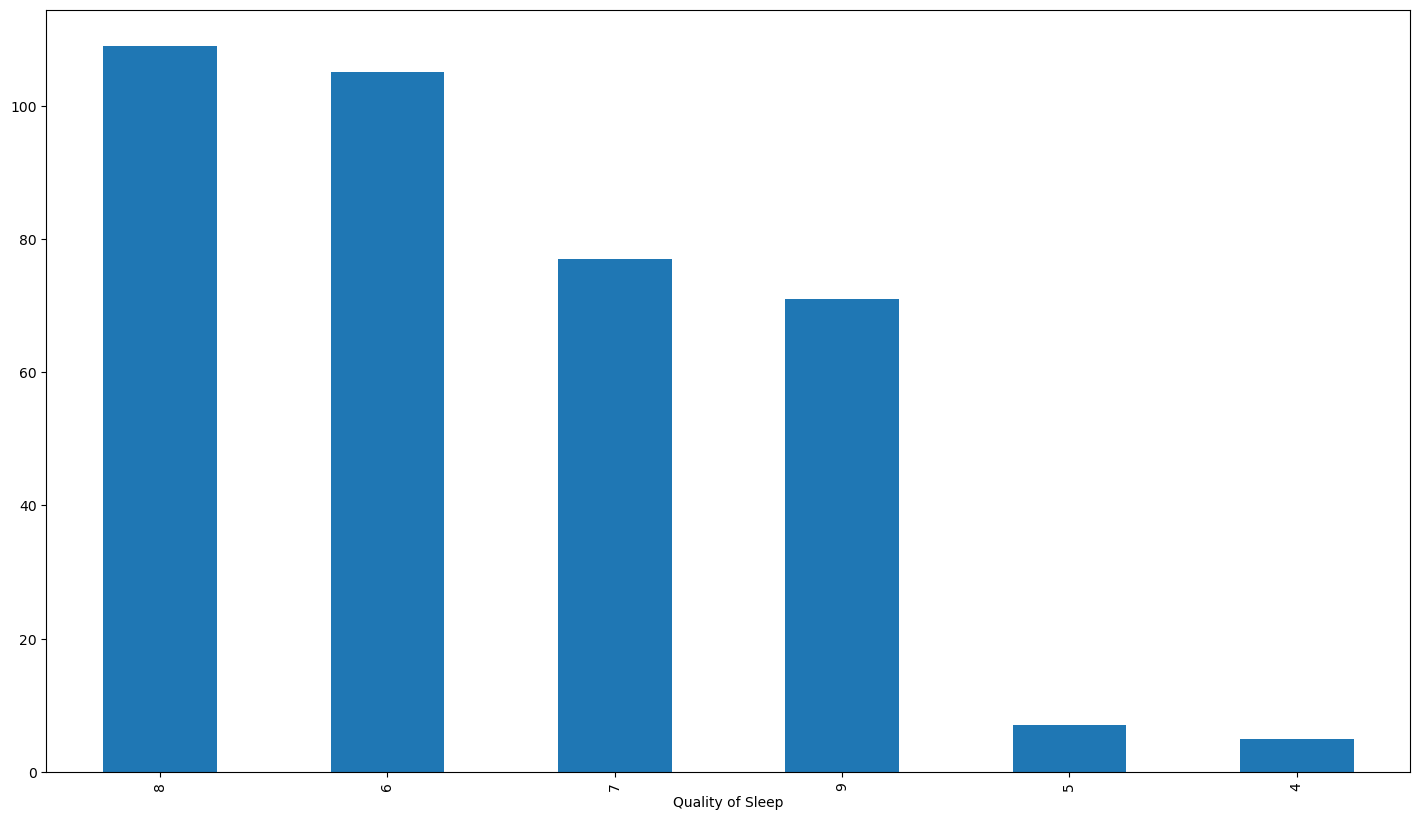

In [76]:
data["Quality of Sleep"].value_counts().plot(kind="bar",xlabel="Quality of Sleep")

<Axes: xlabel='systolic/diastolic'>

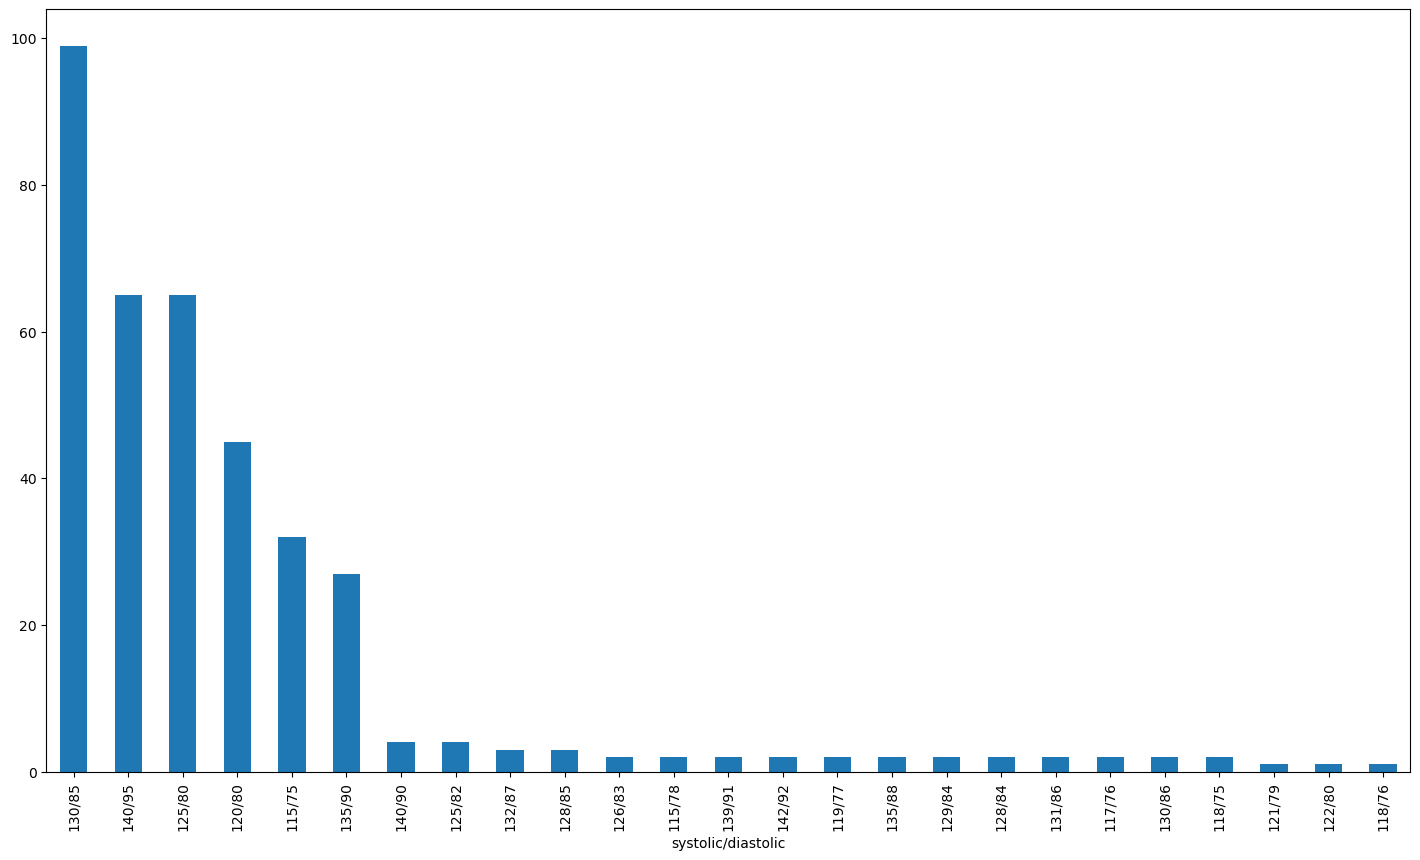

In [74]:
data["Blood Pressure"].value_counts().plot(kind="bar",xlabel="systolic/diastolic")

<Axes: xlabel='Hours', ylabel='Frequency'>

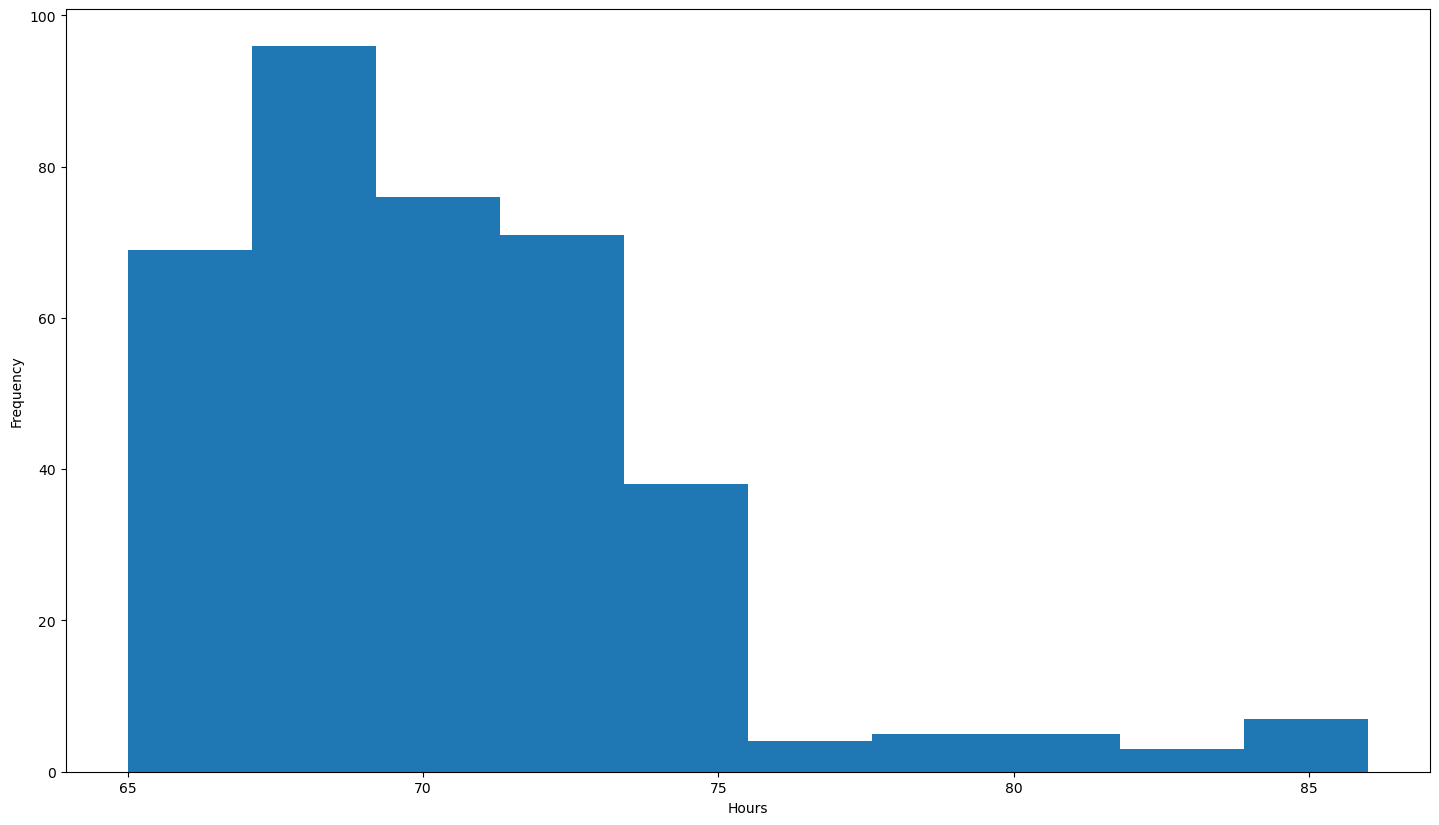

In [77]:
data["Heart Rate"].plot(kind="hist",xlabel="BPM")

<Axes: xlabel='Stress Level'>

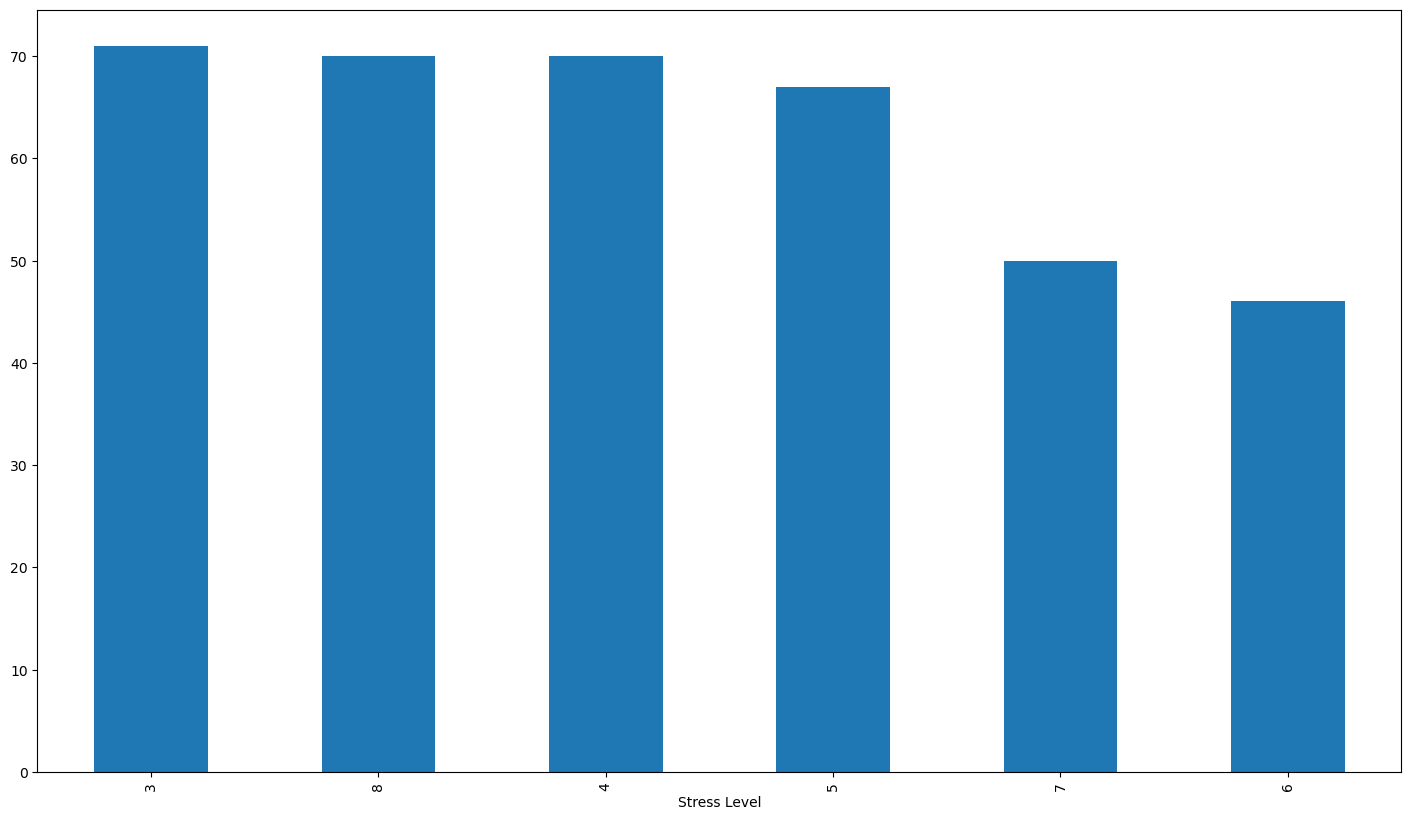

In [80]:
data["Stress Level"].value_counts().plot(kind="bar",xlabel="Stress Level")

<Axes: xlabel='min'>

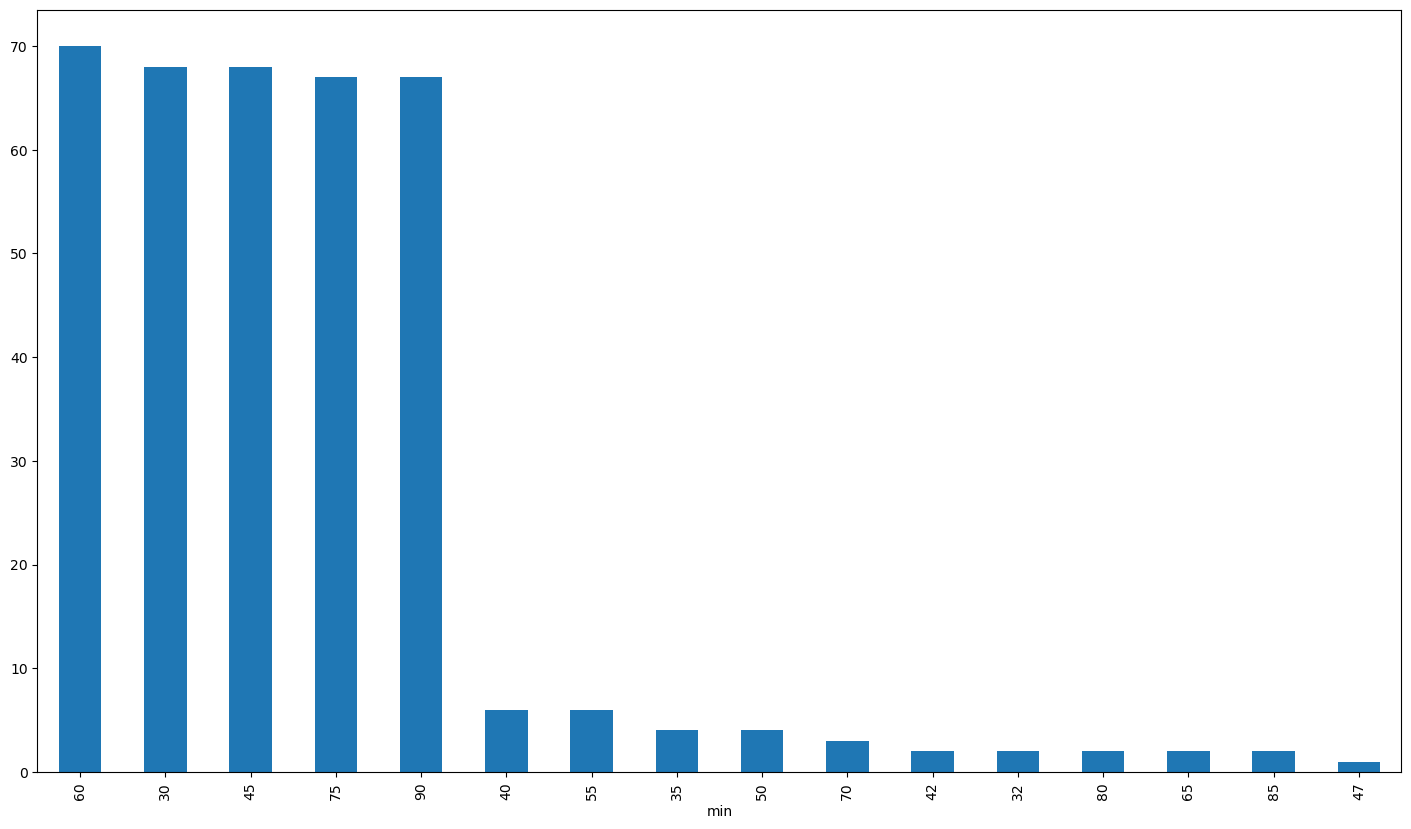

In [83]:
data["Physical Activity Level"].value_counts().plot(kind="bar",xlabel="min")